## **Appliances Energy Prediction :**

Name : Veenalakshmi P V

Organization : Entri Elevate

Date : Evaluation Date





# **1. Overview of the Problem Statement :**
This project focuses on predicting appliance energy consumption using environmental and indoor conditions. The problem revolves around building a machine learning model that utilizes features such as temperature, humidity, and weather conditions to forecast energy usage in a supervised regression framework.

# 2. **Objective:**

The primary objective of this project is to predict the energy consumption of appliances (Appliances) using various environmental and indoor sensor data, such as temperature, humidity, and weather conditions.

# 3. **Data Description:**

# **Source :**
Data Set Link : https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction

The dataset appears to be related to energy consumption and environmental conditions, commonly used in research and modeling tasks.

# **Features** :

**Numerical Features:**

**T1, T2, T3, T4, T5, T6, T7, T8, T9:** Temperature readings at different time points or locations.

**RH_1, RH_2, RH_3, etc.:** Relative humidity readings at different times or locations.

**Appliances:** Power consumption by appliances (target variable).

**lights:** Power consumption by lights.

**T_out:** External temperature.

**Press_mm_hg:** Atmospheric pressure.

**Windspeed:** Wind speed.

**Visibility:** Visibility in the area.

**Tdewpoint:** Dew point.

**rv1, rv2:** Random variables used for noise in data collection.

**Categorical Features:**

**day_of_week:** Could represent the day of the week.

**appliance_type:** Type of appliance.

**location:** Location of the appliances or measurements.

**weather_condition:** Type of weather.

**date:** Timestamps for when each measurement was recorded.

## 4. Data Collection and Exploration :

# **Load The Data set :**

In [13]:
import pandas as pd

#Load the dataset

df = pd.read_csv("/content/drive/MyDrive/energydata_complete.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [22]:
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,1.664924,0.000000,25.566667,46.560000,1.487565,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,1.468511,755.2,3.818256,1.136086,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,1.652291,0.000000,25.500000,46.500000,1.486800,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,1.467640,755.2,3.825862,1.145751,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,1.729194,1.338474,25.500000,46.596667,1.486091,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,1.466762,755.2,3.833438,1.154912,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,1.729194,1.338474,25.500000,46.990000,1.484869,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,1.465879,755.2,3.840985,1.163615,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,1.729194,1.338474,25.500000,46.600000,1.484009,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,1.464990,755.2,3.848501,1.171902,27.000000,13.200000,34.118851,34.118851


In [25]:
df.shape

(19735, 29)

# **Info and Describe : **

In [4]:
# Display the info of the dataset
print(df.info())

# Check column data types
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

# **Gain insights into the data distribution, relationships, and potential patterns.**

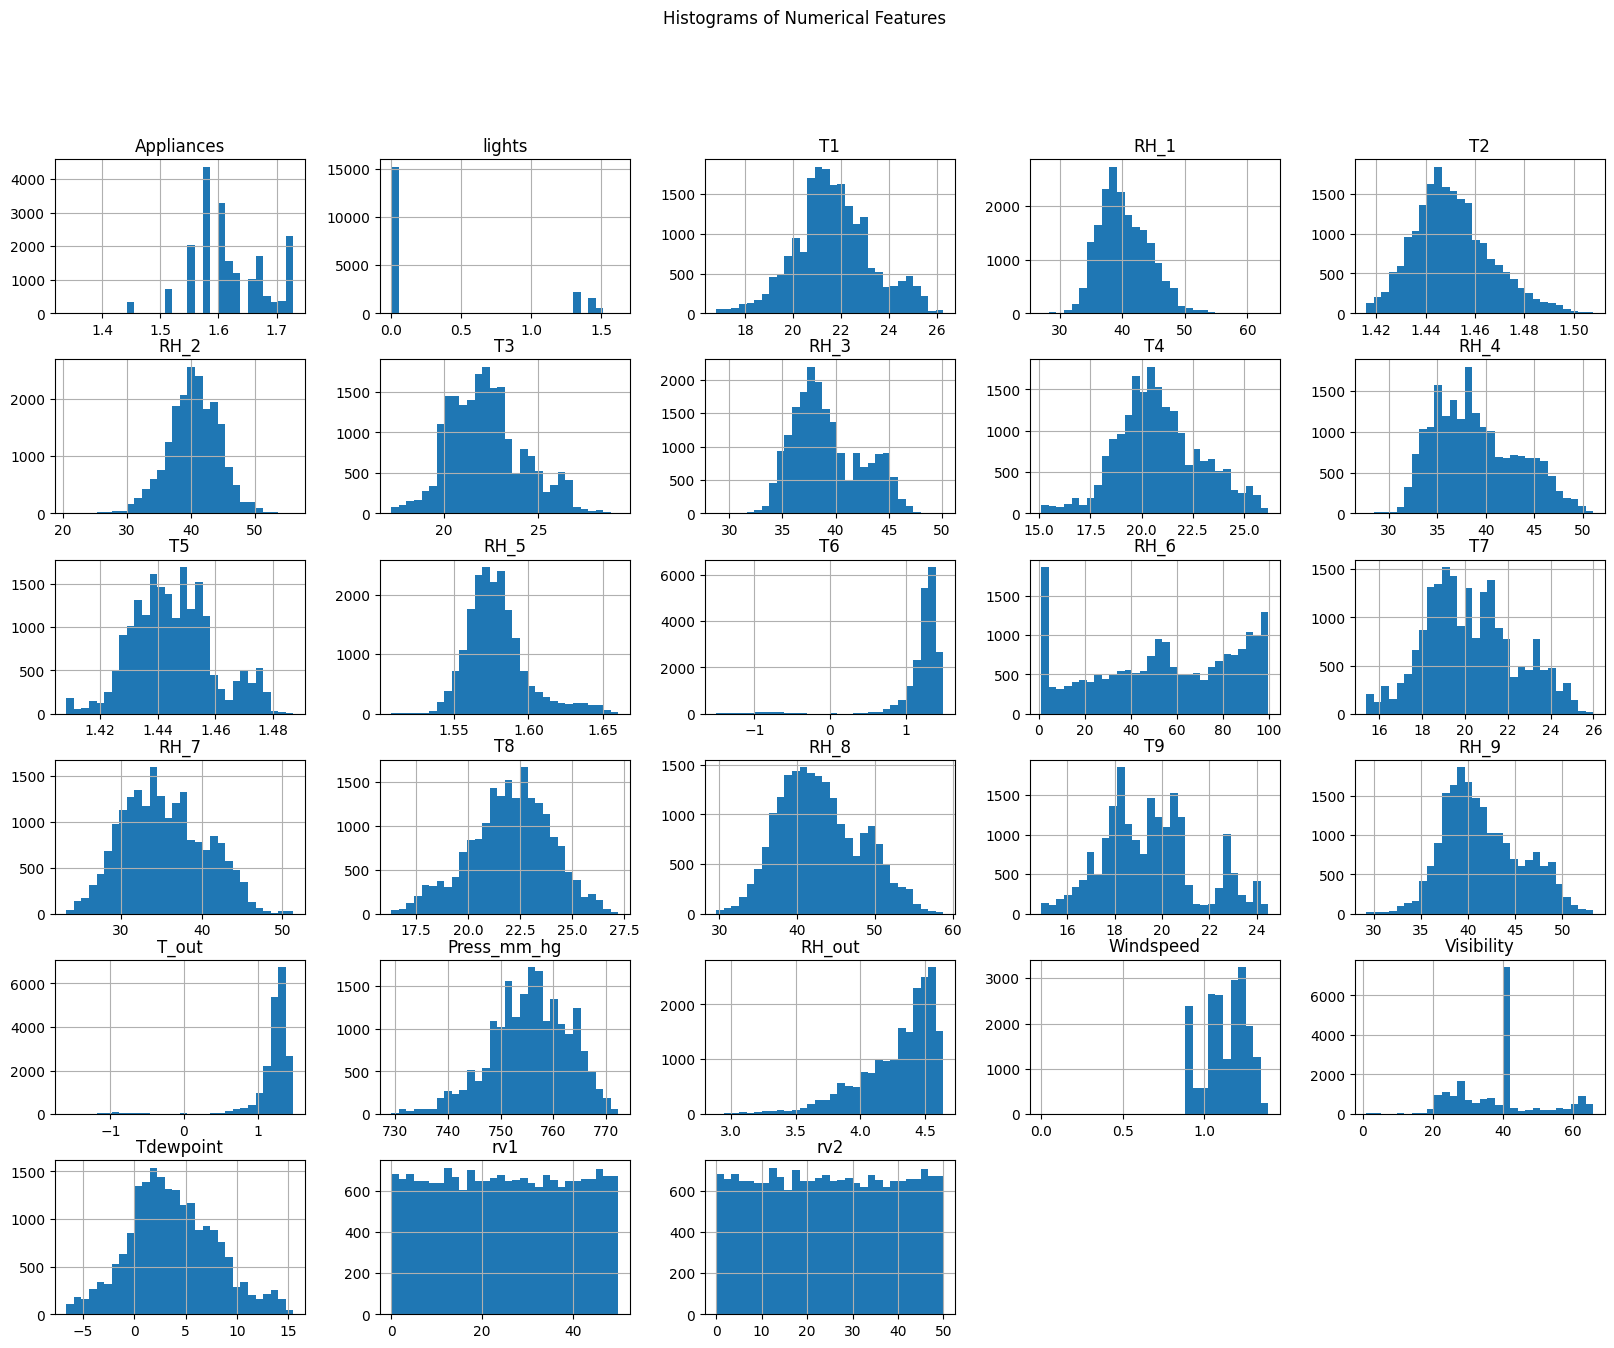

In [41]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(20, 15))
plt.suptitle("Histograms of Numerical Features")
plt.show()


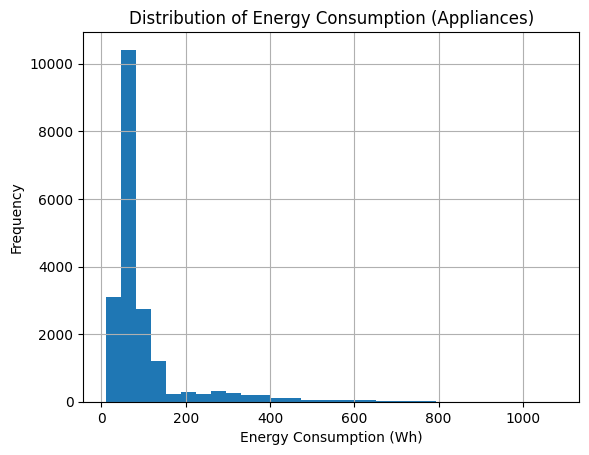

In [ ]:
import matplotlib.pyplot as plt

# Histogram for the target variable
df['Appliances'].hist(bins=30)
plt.title('Distribution of Energy Consumption (Appliances)')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.show()


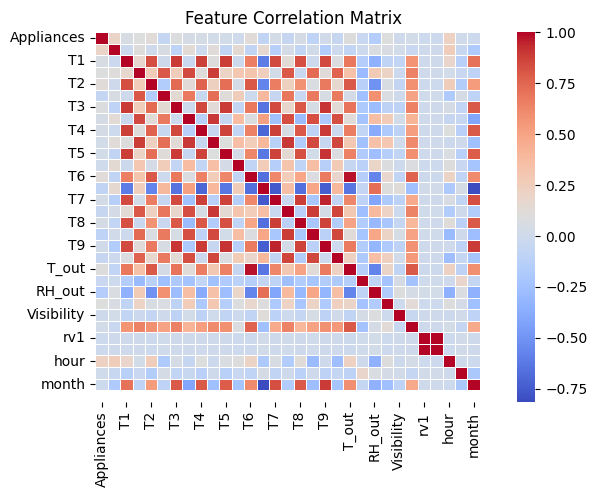

In [ ]:
import seaborn as sns

# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()


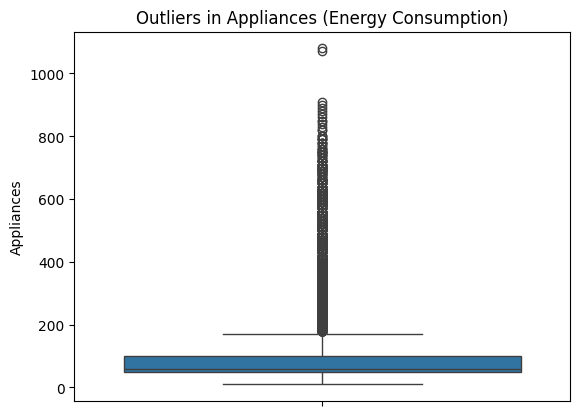

In [ ]:
sns.boxplot(df['Appliances'])
plt.title('Outliers in Appliances (Energy Consumption)')
plt.show()


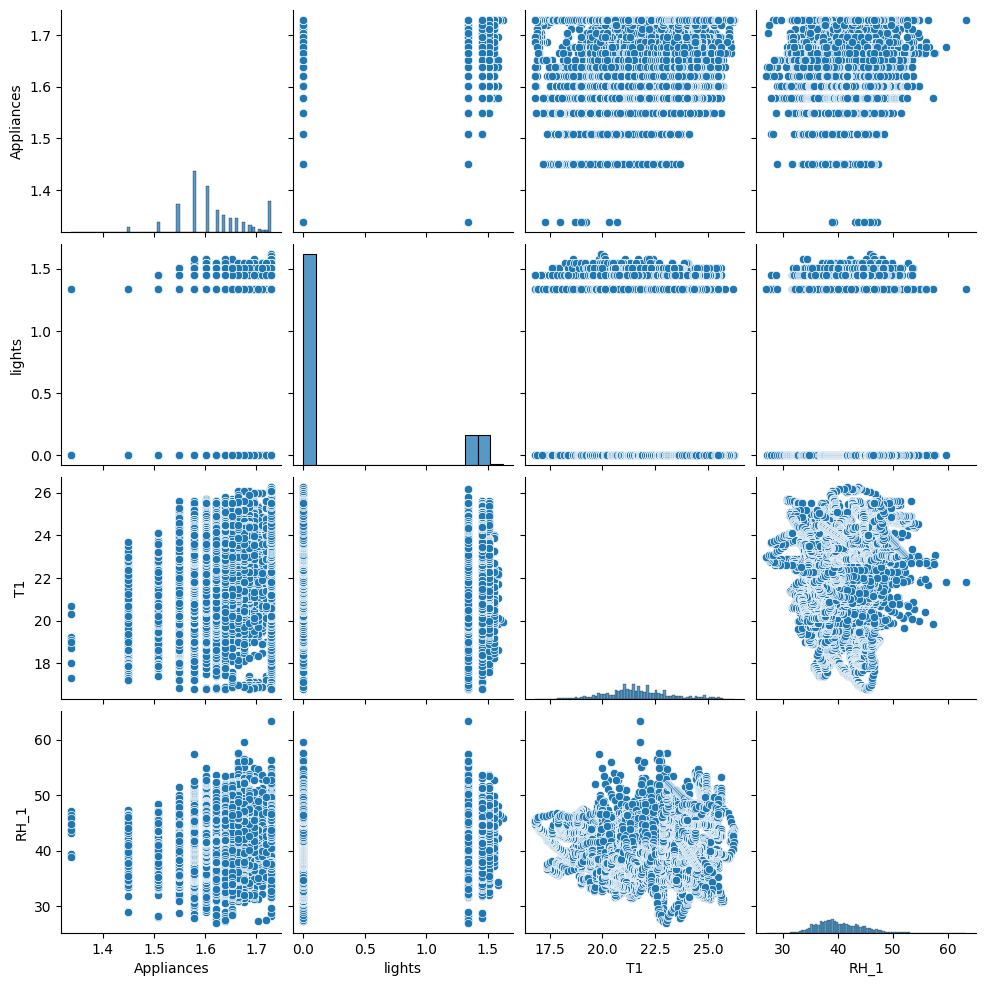

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['Appliances', 'lights', 'T1', 'RH_1']])  # Replace with relevant columns
plt.show()


# **5. Data Preprocessing - Data Cleaning :**
       



# **Handle missing values using appropriate imputation techniques.**


In [9]:

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)





Missing Values in Each Column:
date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


# This Dataset Have No Missing Values  

In [28]:
num_cols = df.select_dtypes(include='number').columns
print("Total Numerical Features:",num_cols.shape)
print("Numeric Features:",num_cols)

Total Numerical Features: (28,)
Numeric Features: Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')
Total Numerical Features: (28,)
Numeric Features: Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')


In [29]:
cat_cols = df.select_dtypes(include='object').columns
print("Total Categorical Features:",cat_cols.shape)
print("Categorical Features:",cat_cols)

Total Categorical Features: (1,)
Categorical Features: Index(['date'], dtype='object')


In [30]:
df.duplicated().sum()

0

No duplicated values found.



In [31]:
df.isnull().sum()


,0
date,0
Appliances,0
lights,0
T1,0
RH_1,0
T2,0
RH_2,0
T3,0
RH_3,0
T4,0




### **No Null Values**

In [32]:
df.columns


Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

# Handle Outliers :
Use methods like IQR or Z-score to detect and treat outliers.

In [46]:
# Calculate Q1, Q3, and IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound))
print("Number of outliers in each column:")
print(outliers.sum())

Number of outliers in each column:
Appliances        0
lights         4483
T1              515
RH_1            146
T2              311
RH_2            235
T3              217
RH_3             15
T4              186
RH_4              0
T5               31
RH_5           1080
T6             1411
RH_6              0
T7                2
RH_7             42
T8               71
RH_8             17
T9                0
RH_9             21
T_out          1527
Press_mm_hg     219
RH_out          450
Windspeed        26
Visibility     2522
Tdewpoint        10
rv1               0
rv2               0
dtype: int64


In [47]:
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

# Apply capping to all numerical columns
for column in numerical_cols:
    cap_outliers(df, column)
print("Outliers capped successfully!")


Outliers capped successfully!


In [61]:
def remove_outliers_iqr(df, column):
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Remove outliers for all numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df = remove_outliers_iqr(df, col)

# Check shape of the cleaned data
print(f"Shape of data after removing outliers: {df.shape}")


Shape of data after removing outliers: (19735, 28)


In [76]:
df1 = df.copy()

In [77]:
# Cap outliers to the threshold values (IQR method)
df1[num_cols] = df1[num_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

print("Shape after capping outliers:", df1[num_cols].shape)

Shape after capping outliers: (19735, 28)


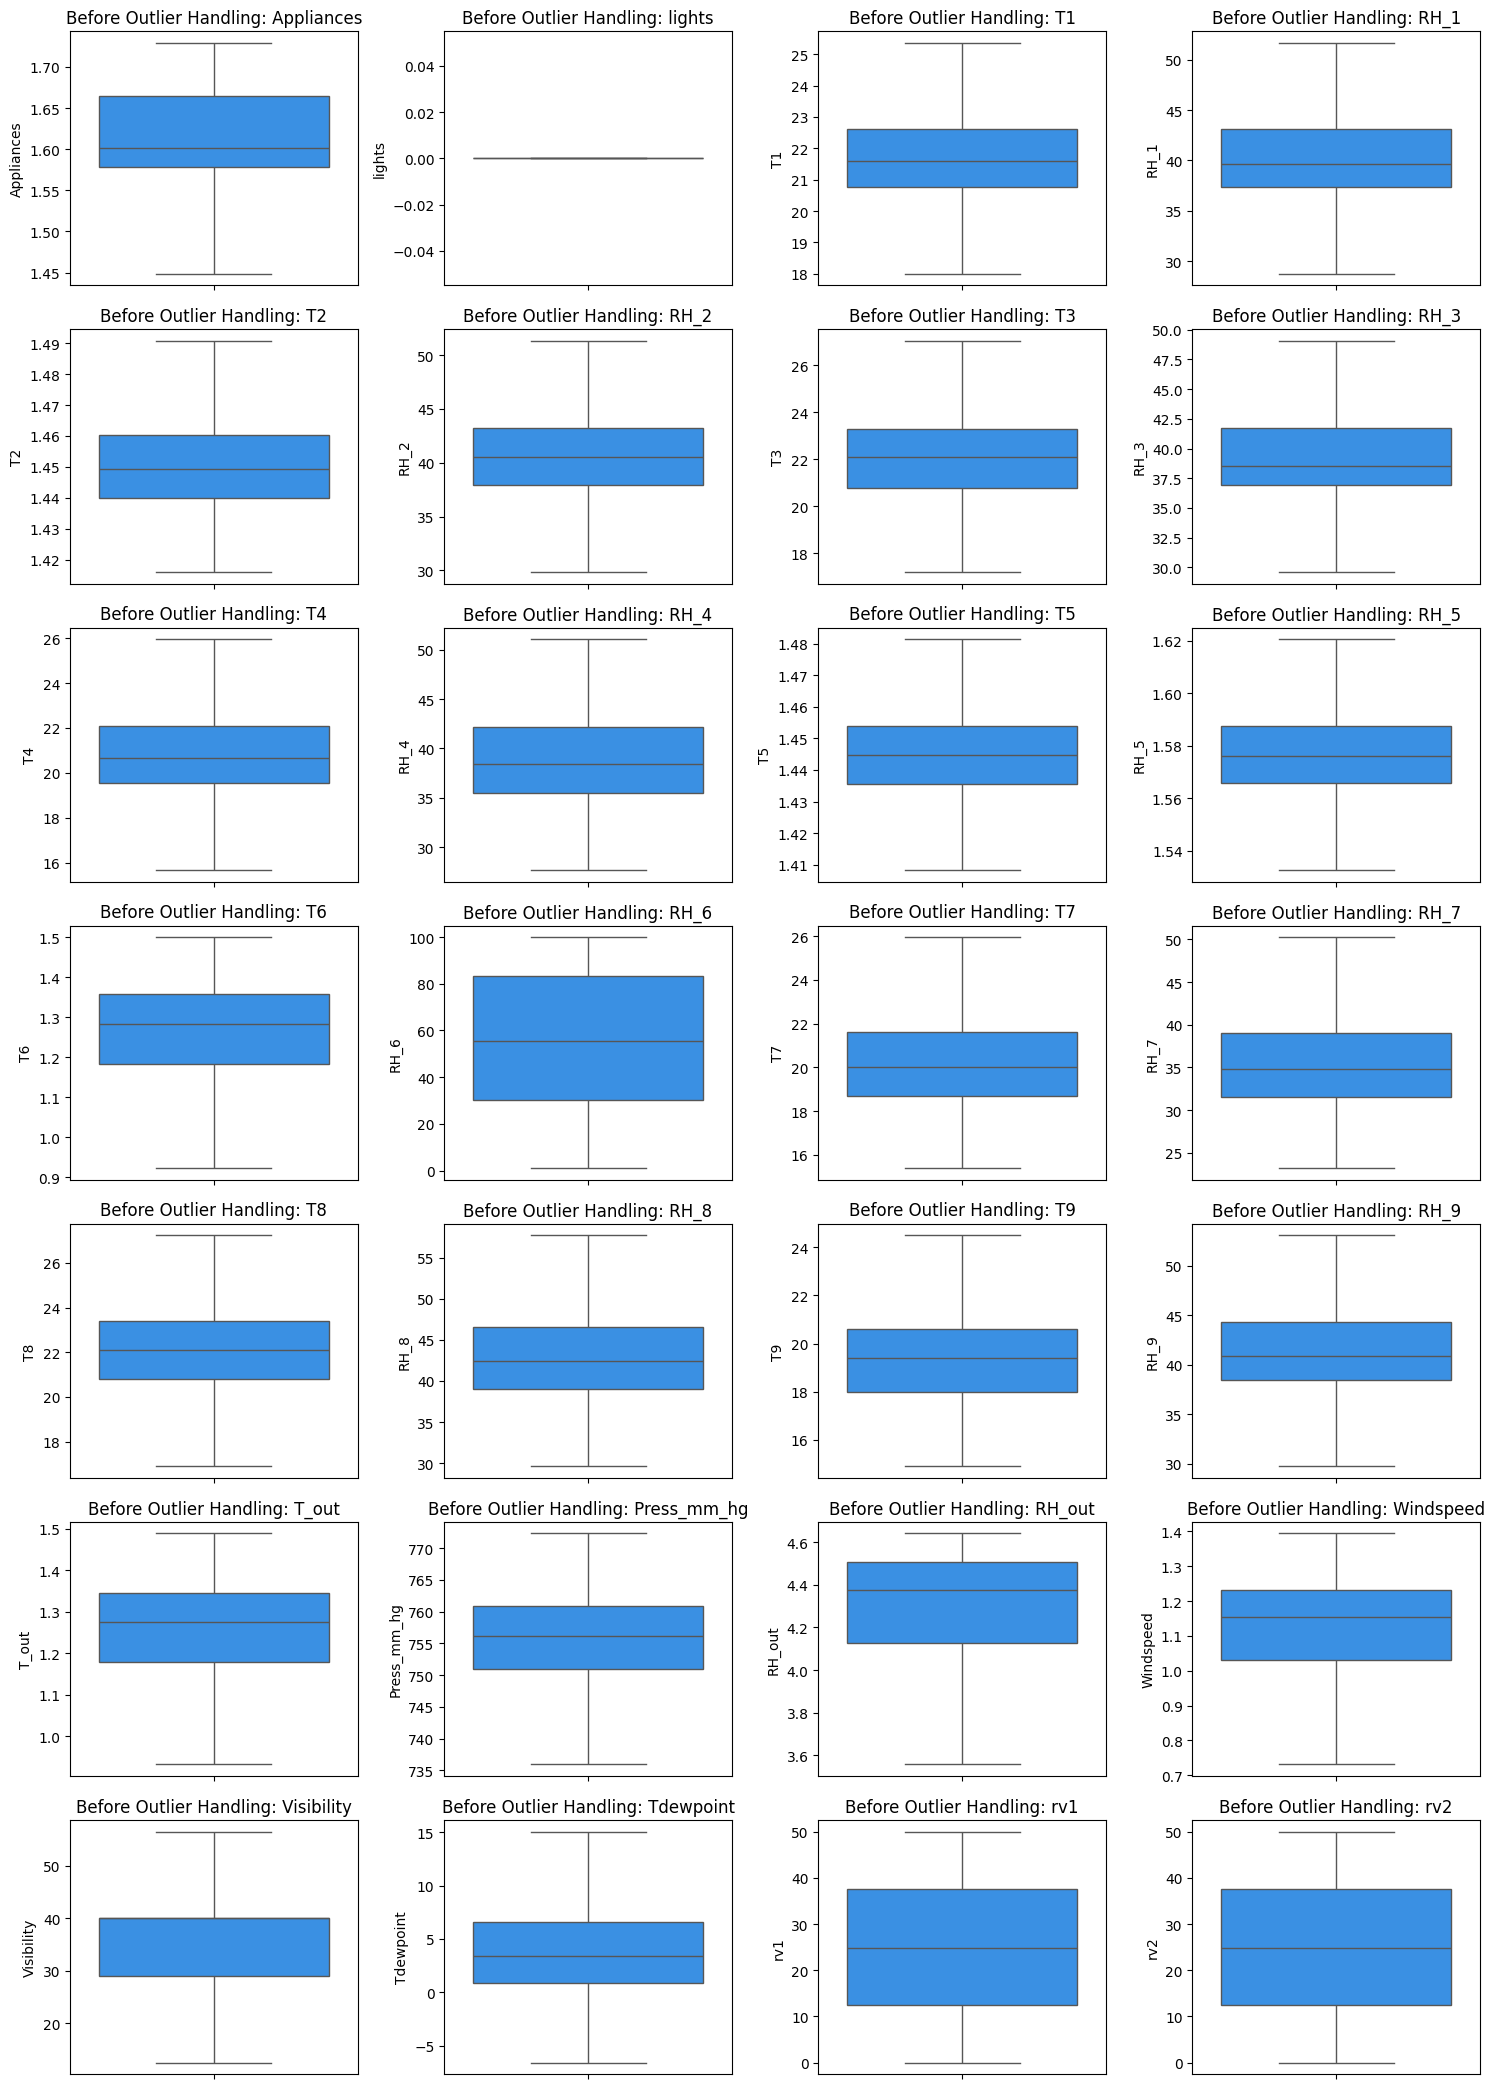

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Calculate number of rows and columns needed for the boxplots
n_cols = 4  # Number of columns per row
n_rows = math.ceil(len(numerical_cols) / n_cols)  # Calculate the required rows

# Plot boxplots for all numerical columns
plt.figure(figsize=(15, n_rows * 3))  # Adjust figure height dynamically
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)  # Adjust subplot position
    sns.boxplot(y=df[col], color='dodgerblue')  # Before outlier handling
    plt.title(f"Before Outlier Handling: {col}")

plt.tight_layout()
plt.show()




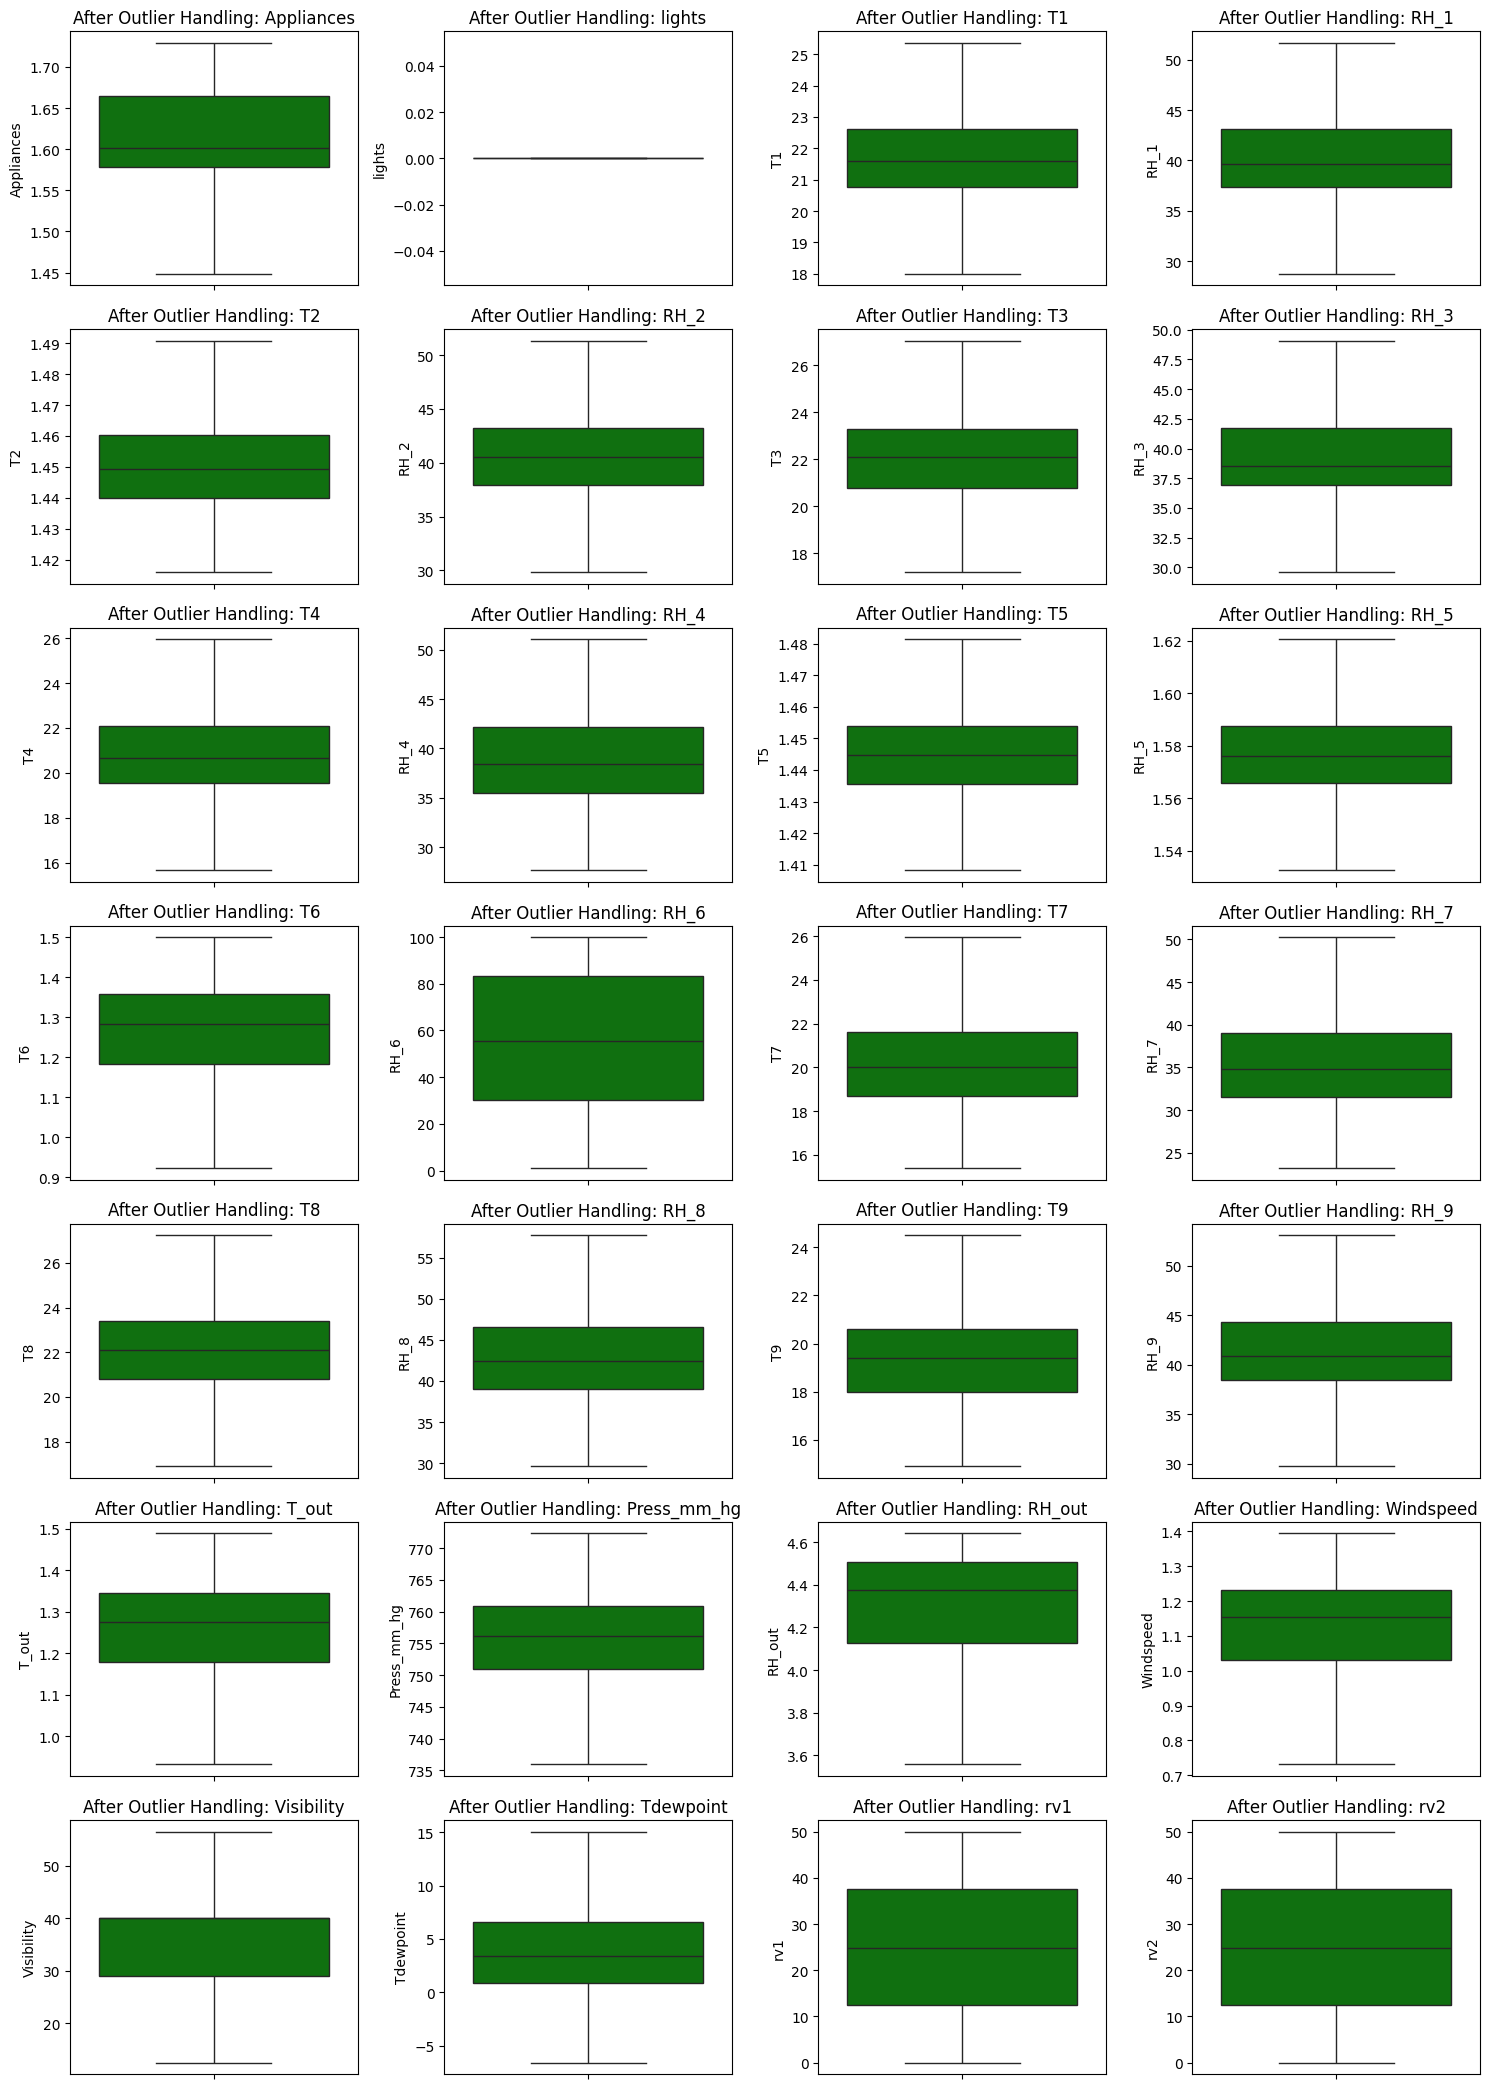

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Calculate number of rows and columns based on the number of numerical columns
n_cols = 4  # Number of columns per row
n_rows = math.ceil(len(numerical_cols) / n_cols)  # Calculate required rows

# Create a figure with the calculated size
plt.figure(figsize=(15, n_rows * 3))  # Adjust figure height dynamically

# Plot boxplots for all numerical columns after outlier handling
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)  # Adjust subplot position dynamically
    sns.boxplot(y=df1[col], color='green')  # Boxplot after outlier handling
    plt.title(f"After Outlier Handling: {col}")

plt.tight_layout()
plt.show()


## **Skewness**

In [97]:
from scipy.stats import skew


# Check skewness of numerical columns
skewed_features = df.select_dtypes(include=['float64', 'int64']).apply(skew)
print("Skewed Features:\n", skewed_features[abs(skewed_features) > 0.5])


Skewed Features:
 RH_5      0.565254
T6       -0.801352
T_out    -0.800982
RH_out   -0.974960
dtype: float64


# **Addressing Skewness** :

In [68]:
skewness = df[num_cols].skew()

# Categorize skewness
no_skewness = skewness[(skewness >= -0.5) & (skewness <= 0.5)]
moderate_skewness = skewness[(skewness > 0.5) & (skewness <= 1) | (skewness < -0.5) & (skewness >= -1)]
high_skewness = skewness[(skewness > 1) | (skewness < -1)]

# Display results
print("Skewness of Numeric Columns:\n", skewness)
print("\nNo Skewness:\n", no_skewness)
print("\nModerate Skewness:\n", moderate_skewness)
print("\nHigh Skewness:\n", high_skewness)

Skewness of Numeric Columns:
 Appliances     0.092625
lights         0.000000
T1             0.166939
RH_1           0.401822
T2             0.440228
RH_2          -0.146187
T3             0.383435
RH_3           0.466830
T4             0.192775
RH_4           0.444614
T5             0.258444
RH_5           0.565297
T6            -0.801413
RH_6          -0.241961
T7             0.254697
RH_7           0.237275
T8            -0.246628
RH_8           0.305941
T9             0.382711
RH_9           0.370684
T_out         -0.801043
Press_mm_hg   -0.338726
RH_out        -0.975034
Windspeed     -0.443219
Visibility     0.157975
Tdewpoint      0.239017
rv1            0.004945
rv2            0.004945
dtype: float64

No Skewness:
 Appliances     0.092625
lights         0.000000
T1             0.166939
RH_1           0.401822
T2             0.440228
RH_2          -0.146187
T3             0.383435
RH_3           0.466830
T4             0.192775
RH_4           0.444614
T5             0.258444
RH_6

In [69]:
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,1.601934,0.0,19.89,47.596667,1.443160,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,1.265804,735.933333,4.514357,1.276387,56.500000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,1.601934,0.0,19.89,46.693333,1.443160,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,1.262578,735.933333,4.514357,1.267619,56.500000,5.200000,18.606195,18.606195
2016-01-11 17:20:00,1.578331,0.0,19.89,46.300000,1.443160,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,1.259283,735.933333,4.514357,1.258329,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,1.578331,0.0,19.89,46.066667,1.443160,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,1.255919,735.933333,4.514357,1.248459,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,1.601934,0.0,19.89,46.333333,1.443160,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,1.252481,735.933333,4.514357,1.237936,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,1.664924,0.0,25.36,46.560000,1.487565,42.025714,27.040000,41.163333,24.700000,45.590000,...,23.200000,46.7900,1.468511,755.200000,3.818256,1.136086,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,1.652291,0.0,25.36,46.500000,1.486800,42.080000,27.040000,41.223333,24.700000,45.590000,...,23.200000,46.7900,1.467640,755.200000,3.825862,1.145751,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,1.729194,0.0,25.36,46.596667,1.486091,42.768571,27.040000,41.690000,24.700000,45.730000,...,23.200000,46.7900,1.466762,755.200000,3.833438,1.154912,25.333333,13.266667,29.199117,29.199117



# **6.Exploratory Data Analysis (EDA) **

# **Analysing numerical columns**



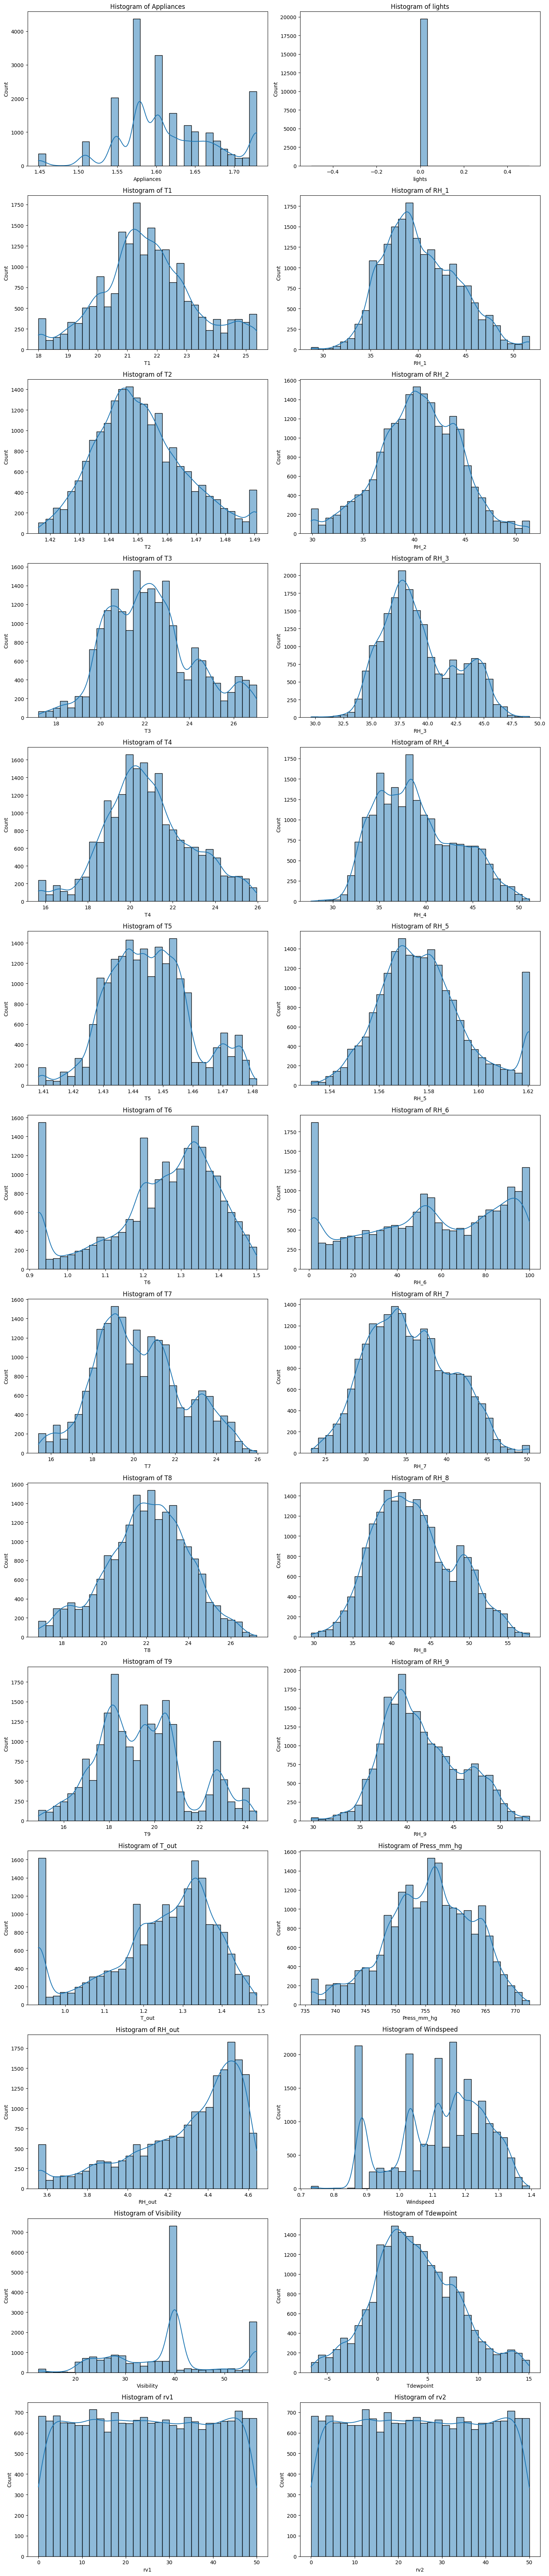

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import math



num_cols = df1.select_dtypes(include=['float64', 'int64']).columns

# Calculate number of columns and rows dynamically
n_cols = 2  # Number of columns per row
n_rows = math.ceil(len(num_cols) / n_cols)  # Calculate the required number of rows

# Create a figure with the calculated size
plt.figure(figsize=(15, n_rows * 5))  # Adjust the height dynamically

# Plot histograms for all numerical columns
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # Adjust subplot position dynamically
    sns.histplot(df1[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()


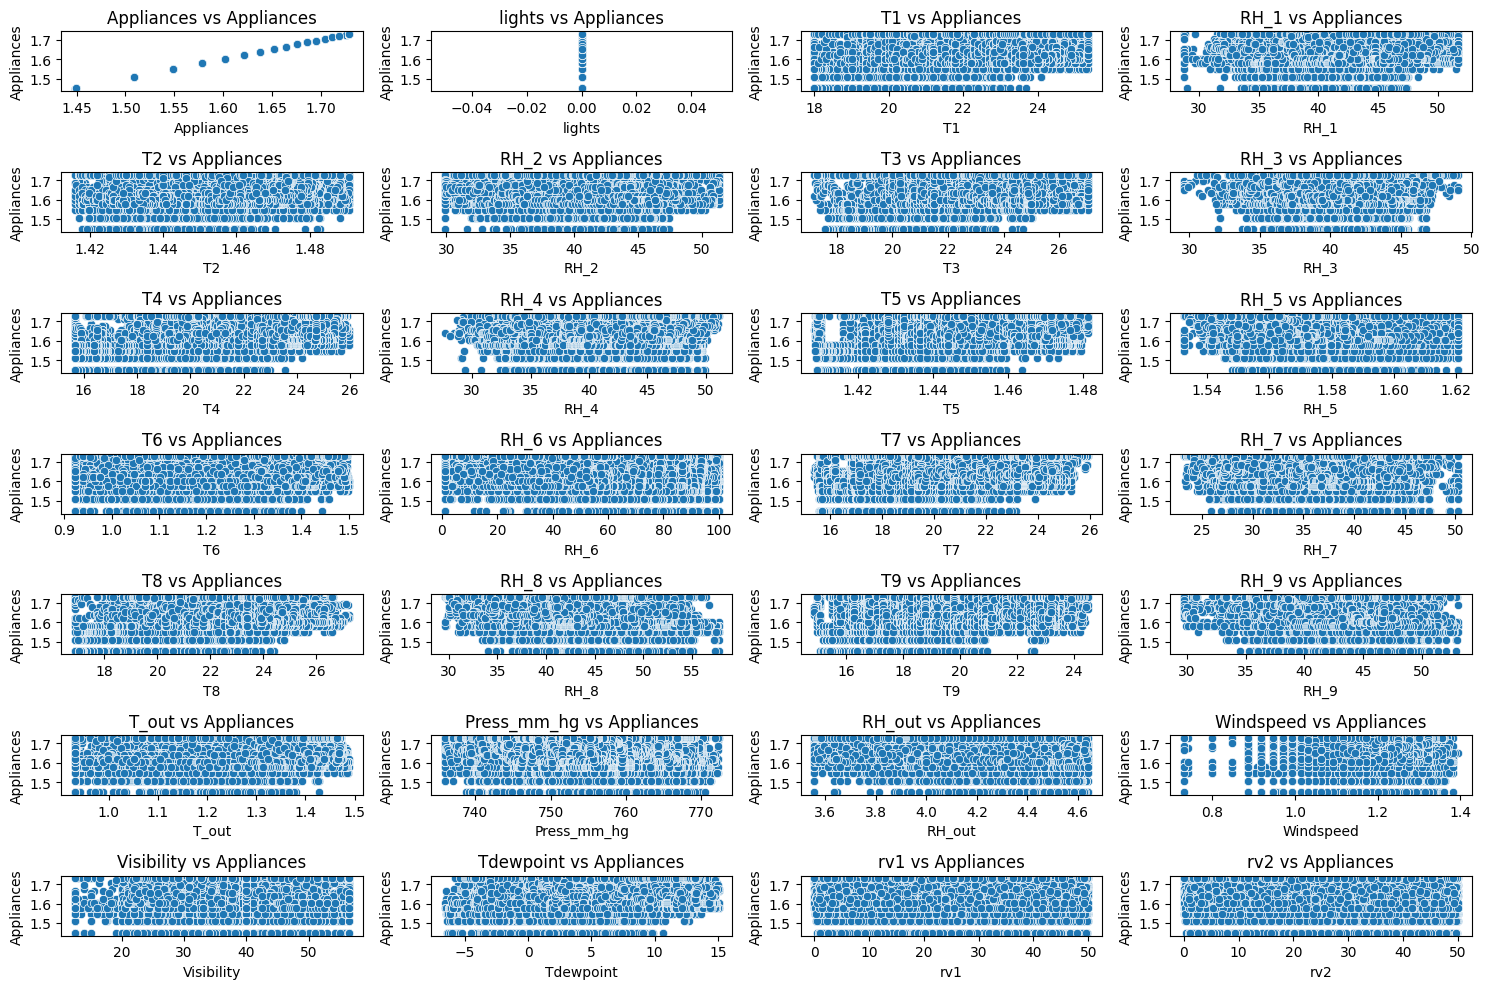

In [81]:
import math

# Number of numerical columns
num_features = len(num_cols)

# Calculate the number of rows and columns needed for subplots
n_cols = 4  # Number of columns (you can adjust this if desired)
n_rows = math.ceil(num_features / n_cols)  # Calculate rows dynamically

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, start=1):
    plt.subplot(n_rows, n_cols, i)  # Dynamically adjust rows and columns
    sns.scatterplot(data=df1, x=col, y='Appliances')
    plt.title(f'{col} vs Appliances')
    plt.xlabel(col)
    plt.ylabel('Appliances')

plt.tight_layout()
plt.savefig("Scatter.png")
plt.show()


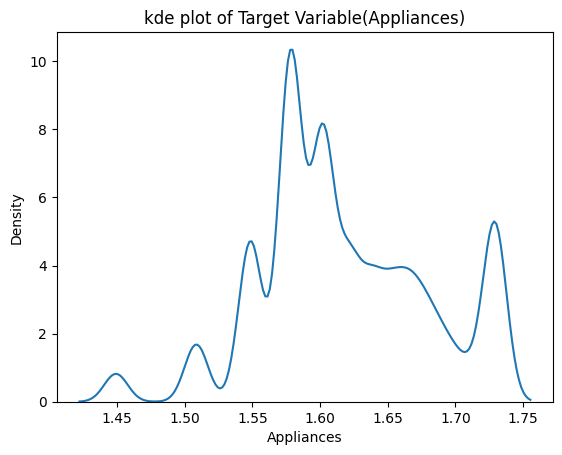

In [83]:
sns.kdeplot(df1.Appliances)
plt.title("kde plot of Target Variable(Appliances)")
plt.show()

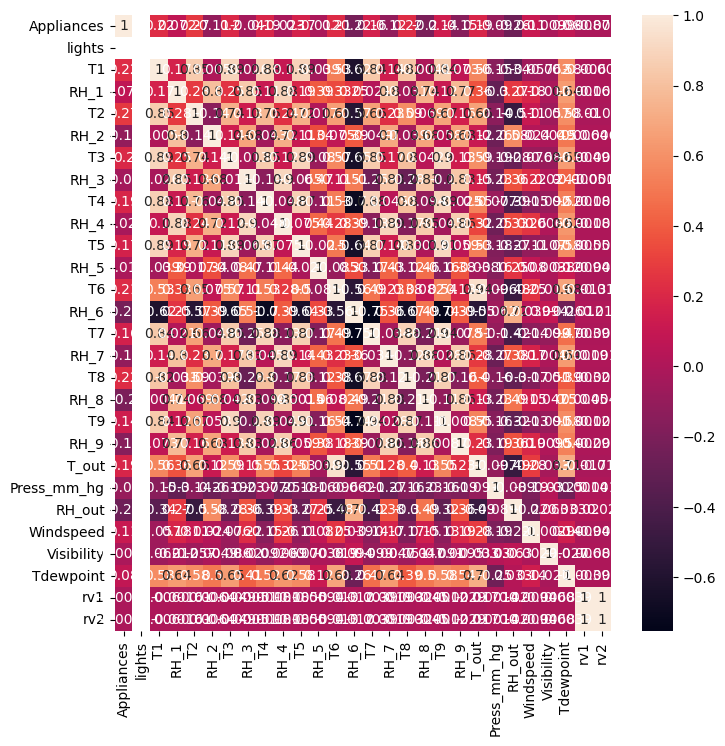

In [84]:
corr1 = df1[num_cols].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr1, annot=True)
plt.savefig("corre.png")
plt.show()

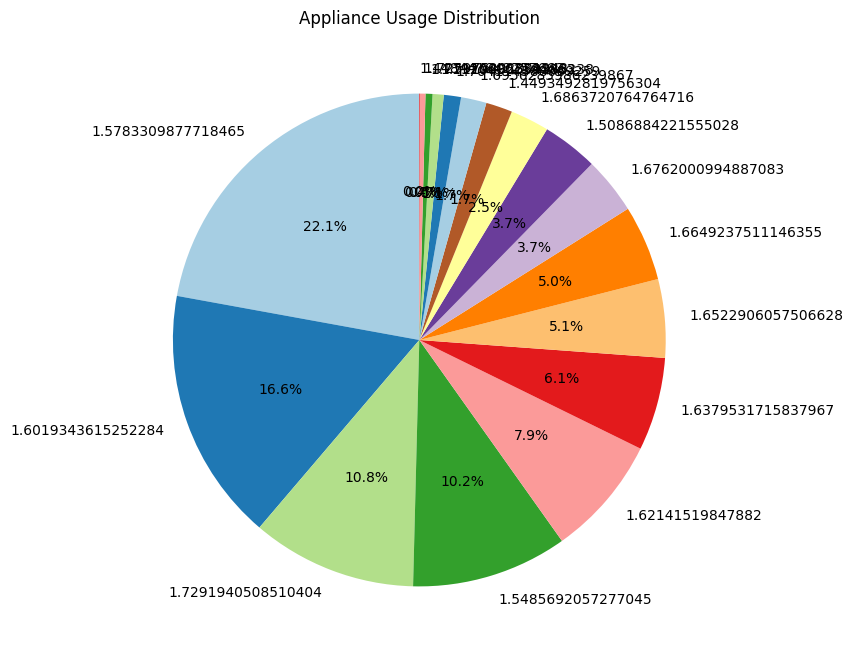

In [90]:
# Count values in each bin
usage_counts = df1['Appliances'].value_counts()

# Create the pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(
    usage_counts,
    labels=usage_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title('Appliance Usage Distribution')
plt.show()


<ipython-input-123-7c1be87a6d7c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Appliances', data=df, palette='viridis')


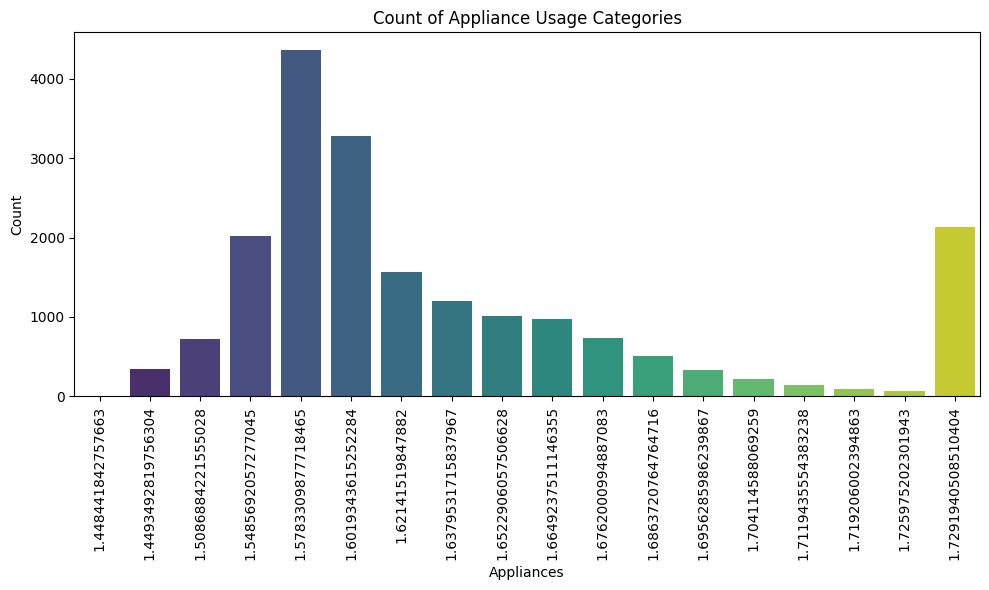

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.countplot(x='Appliances', data=df, palette='viridis')
plt.title('Count of Appliance Usage Categories')
plt.xlabel('Appliances')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


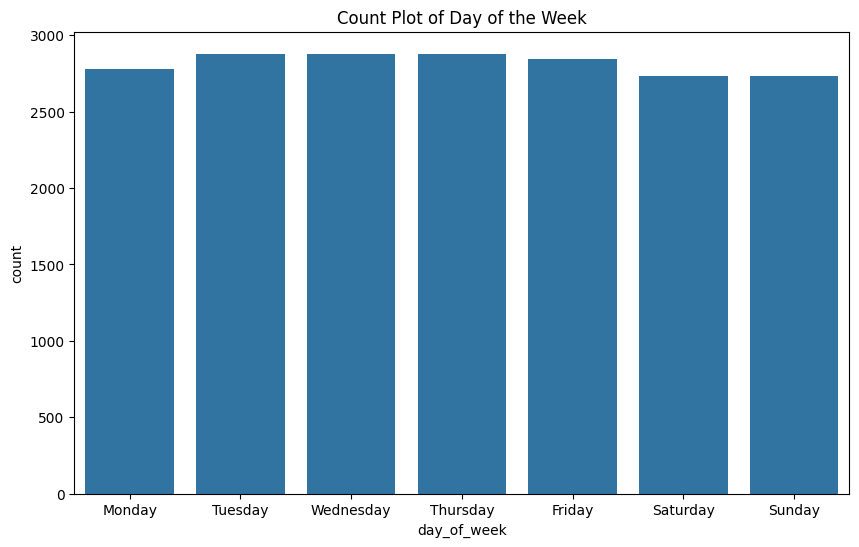

In [ ]:
# Bar plot for 'day_of_week' distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df)
plt.title('Count Plot of Day of the Week')
plt.show()


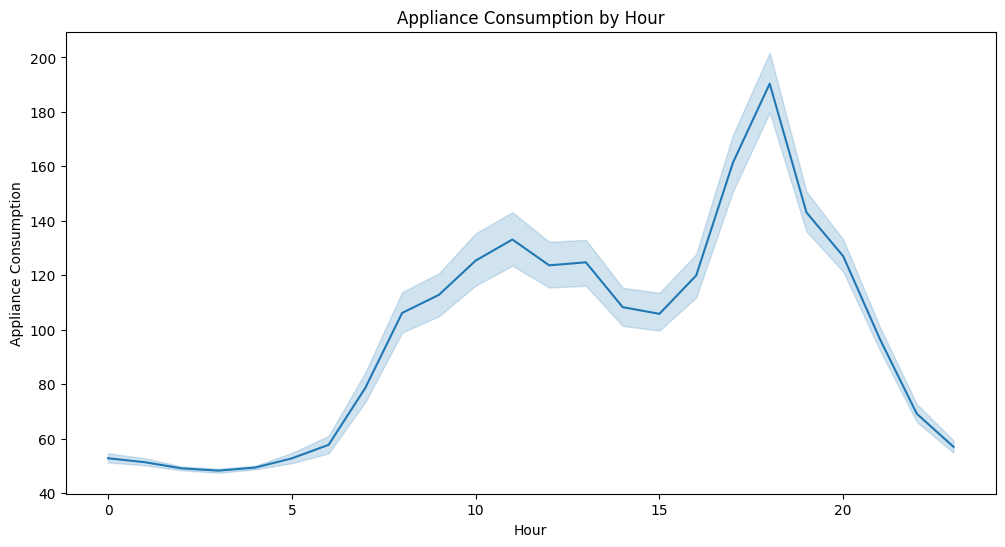

In [ ]:
# Line plot for 'Appliances' consumption by hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='Appliances', data=df)
plt.title('Appliance Consumption by Hour')
plt.xlabel('Hour')
plt.ylabel('Appliance Consumption')
plt.show()


#  ***7.*Feature Engineering:**
- Identify and encode categorical features using techniques like one-hot encoding or label
encoding.

In [112]:
from sklearn.preprocessing import LabelEncoder

 #Label Encoder

label_encoder = LabelEncoder()

# Encode the 'Category' column
df['Appliances_encoded'] = label_encoder.fit_transform(df['Appliances'])

print(df.head())


                     Appliances  lights        T1      RH_1        T2  \
date                                                                    
2016-01-11 17:00:00    1.601934     0.0 -1.139072  1.863478 -0.498226   
2016-01-11 17:10:00    1.601934     0.0 -1.139072  1.634348 -0.498226   
2016-01-11 17:20:00    1.578331     0.0 -1.139072  1.534580 -0.498226   
2016-01-11 17:30:00    1.578331     0.0 -1.139072  1.475395 -0.498226   
2016-01-11 17:40:00    1.601934     0.0 -1.139072  1.543034 -0.498226   

                         RH_2        T3      RH_3        T4      RH_4  ...  \
date                                                                   ...   
2016-01-11 17:00:00  1.092582 -1.245155  1.686863 -0.912635  1.506438  ...   
2016-01-11 17:10:00  1.075633 -1.245155  1.705307 -0.912635  1.604528  ...   
2016-01-11 17:20:00  1.051570 -1.245155  1.749367 -0.948663  1.580918  ...   
2016-01-11 17:30:00  1.042363 -1.245155  1.769859 -0.966677  1.542526  ...   
2016-01-11 17:40:00 

In [101]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np


X = df1.drop('Appliances', axis=1)  # Features
y = df1['Appliances']  # Target variable

# Initialize a RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf.fit(X, y)

# Get feature importance
feature_importances = rf.feature_importances_


feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Display the top important features
print(feature_df)


        Feature  Importance
3            T2    0.106908
16         RH_8    0.072297
2          RH_1    0.060987
18         RH_9    0.055091
21       RH_out    0.054587
15           T8    0.049155
20  Press_mm_hg    0.048187
6          RH_3    0.040585
10         RH_5    0.039355
14         RH_7    0.037143
8          RH_4    0.036193
12         RH_6    0.036150
5            T3    0.035194
7            T4    0.034611
24    Tdewpoint    0.033431
13           T7    0.032628
11           T6    0.031198
9            T5    0.030662
4          RH_2    0.029772
17           T9    0.026838
1            T1    0.022932
19        T_out    0.022868
22    Windspeed    0.022752
23   Visibility    0.016435
26          rv2    0.012225
25          rv1    0.011815
0        lights    0.000000



## 9. **Split Data into Training and Testing Sets:**

In [102]:
from sklearn.model_selection import train_test_split


X = df1.drop('Appliances', axis=1)  # Features
y = df1['Appliances']  # Target variable

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print(f"Training set features shape: {X_train.shape}")
print(f"Testing set features shape: {X_test.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Testing set target shape: {y_test.shape}")


Training set features shape: (15788, 27)
Testing set features shape: (3947, 27)
Training set target shape: (15788,)
Testing set target shape: (3947,)
